In [93]:
import pandas as pd
import numpy as np

twitter_df=pd.read_csv('twitter-archive-enhanced.csv')

In [94]:
print twitter_df.head(2)

             tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/89242

In [95]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [96]:
import requests

predictions=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [97]:
predictions.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [98]:
open('image_predictions.csv','wb').write(predictions.content)

In [99]:
prediction_df=pd.read_csv('image_predictions.csv',sep='\t',error_bad_lines=False)

In [100]:
# import tweepy

# consumer_key = '0ef9ZN1lehgc3G4rh0SQvyYZA'
# consumer_secret = '6dA51cggFj5XqbFLG9PvFGfSYhPUHSQQyHkJnK7ddaFtkP3O6q'
# access_token = 'sHB4eFlSsid2HhjDo16qQRMSvCaoTE'
# access_secret = 'yXIRsIeo3xkWXzLobFLiPLjZMXNfmF8dHgu9HGd9LK01e'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [101]:
import json
tweets=[]
for line in open('tweet_json.txt','r'):
    try:
        tweets.append(json.loads(line))
    except ValueError:
        pass

In [102]:
len(tweets)

2340

In [103]:
import pandas as pd

tweets=pd.DataFrame(tweets)

In [104]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2340 non-null object
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2066 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

I join the twitter_df table with the tweets table. I use a left join, so that all the rows in twitter_df are preserved, but the tweet_ids that are not in twitter_df are removed. I only added the following columns from tweets: 'retweet_count','favorite_count','entities'.

In [105]:
temporary_df=tweets[['id','retweet_count','favorite_count','entities']]
tweet_df=twitter_df.join(temporary_df.set_index('id'), on='tweet_id')

In [106]:
tweet_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,entities
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8380.0,38256.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6188.0,32795.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4093.0,24696.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."


In [107]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

There are 16 rows where the newly added columns are null. These are tweet_ids that appear in the twitter_df data frame but did not appear in the tweets data frame. Let's look at them:

In [108]:
tweet_df[tweet_df['retweet_count'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,entities
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None,NaN,NaN,NaN
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None,NaN,NaN,NaN
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None,NaN,NaN,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None,NaN,NaN,NaN
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None,NaN,NaN,NaN
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None,NaN,NaN,NaN
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None,NaN,NaN,NaN
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None,NaN,NaN,NaN
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,7.266347e+08,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,None,None,None,None,NaN,NaN,NaN
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None,NaN,NaN,NaN


It looks like all of these tweets occured at around the same time (and the dogs are not named). *But I'll leave this data as is, since there is no clear indication it is corrupted in some obvious way.* 

I want to take a closer look at the `text` column, and at the `expanded_urls` column.

In [109]:
for i in range(0,100):
    print tweet_df.loc[i,'text']
    print tweet_df.loc[i,'expanded_urls']
    print ""

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
https://twitter.com/dog_rates/status/892420643555336193/photo/1

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
https://twitter.com/dog_rates/status/892177421306343426/photo/1

This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
https://twitter.com/dog_rates/status/891815181378084864/photo/1

This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
https://twitter.com/dog_rates/status/891689557279858688/photo/1

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
https://twitter.com/dog_rates/status/89132755892668825

It looks like there are some retweets and replies in the data. The retweets' `text` column starts with 'RT' and the replies starts with '@'. I remove these rows from the table. (**QUALITY ISSUE \#1**)

I will also remove rows without an image, by removing rows where `expanded_urls` is nan. (**QUALITY ISSUE \#2**)

In [110]:
import re

for i in tweet_df.index:
    condition=(re.search("^RT",tweet_df.loc[i,'text']) is not None) or (re.search("^@",tweet_df.loc[i,'text']) is not None)
    if condition:
        tweet_df.drop(i, axis=0,inplace=True)
        
tweet_df.dropna(axis=0,subset=['expanded_urls'],inplace=True)

In [111]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2115 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2115 non-null object
source                        2115 non-null object
text                          2115 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2115 non-null int64
rating_denominator            2115 non-null int64
name                          2115 non-null object
doggo                         2115 non-null object
floofer                       2115 non-null object
pupper                        2115 non-null object
puppo                         2115 non-null object
retweet_count                 2112 non

The `retweet_count` and `favorite_count` columns are float. I'll cast them as integer (**QUALITY ISSUE \#3**)

The `tweet_id` is also float, but this shouldn't be a number at all, since it functions more like a name. Therefore I'll cast it as a string.  (**QUALITY ISSUE \#4**)

In [112]:
tweet_df['retweet_count']=tweet_df['retweet_count'].fillna(0.0).astype(int)

tweet_df['favorite_count']=tweet_df['favorite_count'].fillna(0.0).astype(int)

tweet_df['tweet_id']=tweet_df['tweet_id'].fillna(0.0).astype(str)

Let's look next at dog names. First I'll check to see how many dogs have no name. Second, it's likely that having used a regular expression to extract dog names might have selected also some words that are not dog names - so I'll check for 'names' that start with a lower-case letter.

In [113]:
tweet_df[tweet_df['name']=='None']['name'].count()

620

In [114]:
tweet_df[tweet_df['name'].str.islower()]['name'].count()

104

Let's see some of the entries where the dog names start with lower case. I'll print the `text` and `name` columns for each:

In [115]:
for i in tweet_df[tweet_df['name'].str.islower()].index:
    print tweet_df.loc[i,'text']
    print tweet_df.loc[i,'name']
    print ''

I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
such

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
a

We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
quite

Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
quite

There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7
not

Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
one

We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
incredibly

It looks like the regex used picked up the first word after 'This is' or 'Here is' and so on. In many of these cases, the `text` column doesn't contain any name whatsoever, so the `name` column should be empty. However, in some of these cases, the `text` column does contain a dog name. I'll try to build some regular expressions to capture the names, and for the rest I will just replace `name` value with 'None'. **QUALITY ISSUE \#5**

In [116]:
import re

test=tweet_df[tweet_df['name'].str.islower()]
for i in test.index:
    if re.search("named\s[A-Z]\w*",test.loc[i,'text']) is not None:
        expression=re.search("named\s[A-Z]\w*",test.loc[i,'text']).group()
        test.loc[i,'name']=expression.split(' ')[1]
    elif re.search('That\sis\s[A-Z]\w*',test.loc[i,'text']) is not None:
        expression=re.search("That\sis\s[A-Z]\w*",test.loc[i,'text']).group()
        test.loc[i,'name']=expression.split(' ')[2]
    elif re.search('name\sis\s[A-Z]\w*',test.loc[i,'text']) is not None:
        expression=re.search("name\sis\s[A-Z]\w*",test.loc[i,'text']).group()
        test.loc[i,'name']=expression.split(' ')[2]
    else:
        test.loc[i,'name']=None
        
for i in test.index:
    tweet_df.loc[i,'name']=test.loc[i,'name']

Next I look at the ratings. Although it's ok for the numerator to be higher than 10, the denominator should always be 10. Let's check:

In [117]:
for i in tweet_df[tweet_df['rating_denominator']!=10].index:
    print tweet_df.loc[i,'rating_denominator']
    print tweet_df.loc[i,'text']
    print ''

70
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

7
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

150
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

11
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

170
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

20
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

50
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq

90
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1

80
Here's a brigade of puppers. All look very prepared for whatever happens next

There are three problems: first, when the denominator is 10\*n, that's a rating for n dogs. Second, when the denominator is different than that, the regex used picked the wrong ratio ('7/11' refers to the store, for example, and it's not a rating). Third, there are cases when even if the denominator is 10, the numerator is identified incorrectly: '7.26/10' is identified as having a numerator of value '26'.

To fix this column, I will address the above issues in reverse order: first I construct a regex that only picks ratios that have a multiple of 10 as denominator. Then, for the ones whose denominator is different than 10, I normalize them. **QUALITY ISSUE \#6**

In [118]:
for i in tweet_df.index:
    if re.search('\d+\.\d+/\d0',tweet_df.loc[i,'text']) is not None:
        tweet_df.loc[i,'rating_denominator']=int(re.search('\d+\.\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[1])
        tweet_df.loc[i,'rating_numerator']=re.search('\d+\.\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[0]
    elif re.search('\d+/\d0',tweet_df.loc[i,'text']) is not None:
        tweet_df.loc[i,'rating_denominator']=int(re.search('\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[1])
        tweet_df.loc[i,'rating_numerator']=re.search('\d+/\d0',tweet_df.loc[i,'text']).group().split('/')[0]
    else:
        tweet_df.loc[i,'rating_denominator']=None
        tweet_df.loc[i,'rating_numerator']=None
    
for i in tweet_df[tweet_df['rating_denominator']!=10].index:
    try:
        if tweet_df.loc[i,'rating_denominator']!=None:
            old_denom=int(tweet_df.loc[i,'rating_denominator'])
            new_num=int(tweet_df.loc[i,'rating_numerator']*10)/old_denom
            tweet_df.loc[i,'rating_numerator']=new_num
            tweet_df.loc[i,'rating_denominator']=10
    except ValueError:
        pass


Next I change the `timestamp` column to a datetime format. (**QUALITY ISSUE \#7**)

In [119]:
tweet_df['timestamp']=pd.to_datetime(tweet_df['timestamp'])

Let's take a look at what is in the 'entities' column:

In [120]:
tweet_df['entities'][0]

{u'hashtags': [],
 u'media': [{u'display_url': u'pic.twitter.com/MgUWQ76dJU',
   u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   u'id': 892420639486877696,
   u'id_str': u'892420639486877696',
   u'indices': [86, 109],
   u'media_url': u'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   u'media_url_https': u'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   u'sizes': {u'large': {u'h': 528, u'resize': u'fit', u'w': 540},
    u'medium': {u'h': 528, u'resize': u'fit', u'w': 540},
    u'small': {u'h': 528, u'resize': u'fit', u'w': 540},
    u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}},
   u'type': u'photo',
   u'url': u'https://t.co/MgUWQ76dJU'}],
 u'symbols': [],
 u'urls': [],
 u'user_mentions': []}

I will extract some data from the `entities` column. To begin with, I want to extract `hashtags`, `symbols`, `urls`, and `user_mentions`. I'll decide what to keep from these after I take a look at the data.

In [121]:
def value_to_string(value,dic):
    st=''
    for element in dic[value]:
        st+=str(element)
    return st

def update_df(value):
    i=0
    for i in range (0,tweet_df.shape[0]):
        try:
            tweet_df.loc[i,value]=value_to_string(value,tweet_df.loc[i,'entities'])
            i=i+1
        except TypeError: # entities column is nan
            pass
        except KeyError:
            tweet_df.loc[i,value]=' '
            
update_df('urls')
update_df('user_mentions')
update_df('hashtags')
update_df('symbols')

Let's look at what the `hashtags` column contains:

In [122]:
tweet_df[(tweet_df['hashtags'].notnull())&(tweet_df['hashtags']!='')].head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,retweet_count,favorite_count,entities,urls,user_mentions,hashtags,symbols
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,9230.0,39762.0,"{u'symbols': [], u'user_mentions': [], u'hasht...",,,"{u'indices': [129, 138], u'text': u'BarkWeek'}",


It looks like the hashtag is buried a little deeper in the json structure, under the 'text' key. I want to keep this information, because I would like to see which hashtags are the most common. But before I do that I look at the other columns I created. Next is `symbols` column.

In [123]:
tweet_df[(tweet_df['symbols'].notnull())&(tweet_df['symbols']!='')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,retweet_count,favorite_count,entities,urls,user_mentions,hashtags,symbols


This column is empty so I discard it:

In [124]:
tweet_df.drop('symbols',axis=1,inplace=True)

Next I look at `url` column:

In [125]:
tweet_df[(tweet_df['urls'].notnull())&(tweet_df['urls']!='')].head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,retweet_count,favorite_count,entities,urls,user_mentions,hashtags
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,None,None,None,None,2037.0,11681.0,"{u'symbols': [], u'user_mentions': [], u'hasht...","{u'url': u'https://t.co/Zr4hWfAs1H', u'indices...",,


The text in the `url` column is truncated, so I just choose one cell to print:

In [126]:
tweet_df.loc[6,'urls']

"{u'url': u'https://t.co/Zr4hWfAs1H', u'indices': [117, 140], u'expanded_url': u'https://gofundme.com/ydvmve-surgery-for-jax', u'display_url': u'gofundme.com/ydvmve-surgery\\u2026'}"

I don't think I'll use this data, so I just remove the column.

In [127]:
tweet_df.drop('urls',axis=1,inplace=True)

Finally, I look at `user_mentions` column.

In [128]:
tweet_df[(tweet_df['user_mentions'].notnull())&(tweet_df['user_mentions']!='')]['user_mentions'].head(1)

62    {u'indices': [60, 72], u'screen_name': u'porch...
Name: user_mentions, dtype: object

Again, I don't think i want to keep any of this data in my table. So I extract hashtags from the `hashtags` column (**QUALITY ISSUE \#8**)

In [129]:
def hashtag_to_string(dic):
    st=''
    if dic['hashtags']!=[]:
        for hashtag in dic['hashtags']:
            st+=str(hashtag['text'])+','
    return st
    
for i in range (0,tweet_df.shape[0]):
    try:
        tweet_df.loc[i,'hashtags']=hashtag_to_string(tweet_df.loc[i,'entities'])
        i=i+1
    except TypeError:
        print i
        pass
    except KeyError:
        tweet_df.loc[i,'hashtags']=' '

19
30
32
36
55
64
68
73
74
78
91
95
97
101
109
113
118
124
130
132
137
146
148
155
159
160
165
171
179
180
182
185
186
188
189
194
195
204
211
212
218
222
228
230
231
234
247
250
260
266
272
273
274
281
285
286
289
290
291
298
302
303
307
309
310
313
319
327
332
340
341
342
343
346
357
359
366
375
382
386
387
397
399
406
409
411
415
420
422
425
427
431
434
435
438
446
447
450
453
455
462
465
469
475
476
479
485
488
498
506
513
522
530
535
538
541
543
546
552
555
558
561
566
568
570
574
576
577
581
583
586
589
594
595
596
597
598
599
600
601
602
603
604
605
606
611
612
615
618
627
629
634
654
655
656
661
664
669
671
677
682
686
692
694
701
702
707
720
728
741
742
745
749
753
759
764
767
770
773
778
784
794
800
811
815
818
822
826
829
833
841
843
847
857
860
868
872
885
890
895
908
911
926
932
937
943
949
967
1005
1012
1023
1043
1080
1242
1286
1295
1345
1445
1446
1474
1479
1497
1523
1598
1605
1618
1663
1689
1698
1774
1819
1844
1860
1895
1905
1914
1940
2038
2149
2189
2259
2260
2298
2355


The `hashtags` column is not stored in a useful way - it's a string where each hashtag is separated from the next by a comma. I need to separate these hashtags, and then store each hashtag on a different row. I could either do this in the main dataframe (tweet_df) or I could just create an aditional hashtag dataframe. The main advantage if I go the second route is that I won't have duplicated tweet_ids in the main table, which rows will just repeat a lot of the same data (also, when doing visualizations, I will need to use a lot of group_by clauses if the data is all duplicated in this way). So I create an extra table (**TIDYING ISSUE \#1**) and then I drop the `entities` column from tweet_df.

In [130]:
hashtag_table=[]

for i in tweet_df[tweet_df['hashtags']!=' '].index:
    try:
        if pd.isnull(tweet_df.loc[i,'hashtags'])==False:
            hashtag_list=tweet_df.loc[i,'hashtags'].split(',')[0:-1]
            for i in range(len(hashtag_list)):
                hashtag_table.append({'tweet_id':str(tweet_df.loc[i,'tweet_id']),'hashtag':hashtag_list[i]})
    except ValueError:
        print i
hashtag_df=pd.DataFrame(hashtag_table)

tweet_df.drop('entities',axis=1,inplace=True)

The four columns that indicate dog stage are all instances of the same variable, namely dog stage. So we can collapse these into a single column. (**TIDYING ISSUE \#2**)

In [131]:
test_df=tweet_df[['tweet_id','doggo','floofer','pupper','puppo']]
melted=pd.melt(test_df,id_vars=['tweet_id'],value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_stage')
dog_stage_df=melted[['tweet_id','dog_stage']]
dog_stage_df.head()

,tweet_id,dog_stage
0,892420643555336193,None
1,892177421306343426,None
2,891815181378084864,None
3,891689557279858688,None
4,891327558926688256,None


In [132]:
dog_stage_df.shape

(9424, 2)

In [133]:
dog_stage_df=dog_stage_df[dog_stage_df['dog_stage']!='None']
dog_stage_df.shape

(1314, 2)

In [134]:
tweet_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,user_mentions,hashtags
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10.0,Phineas,None,None,None,None,8380.0,38256.0,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10.0,Tilly,None,None,None,None,6188.0,32795.0,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10.0,Archie,None,None,None,None,4093.0,24696.0,,


In [135]:
dog_stage_df=dog_stage_df[dog_stage_df['dog_stage']!='None']
dog_stage_df.dropna(inplace=True)
tweet_df=tweet_df.join(dog_stage_df[dog_stage_df['dog_stage']!='None'].set_index('tweet_id'), on='tweet_id',how='left')

In [137]:
tweet_df.shape

(2368, 22)

In [138]:
tweet_df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

Let's also drop the three columns that have only null values, and any rows where tweet_id is null. We can then save the resulting clean(er) dataframe as a csv file.

In [154]:
tweet_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)
tweet_df.dropna(subset=['tweet_id'],axis=0,inplace=True)
tweet_df=tweet_df.reset_index()

tweet_df.to_csv('twitter_archive_master.csv')

In [155]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 18 columns):
level_0                  2127 non-null int64
index                    2127 non-null int64
tweet_id                 2127 non-null object
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                2127 non-null datetime64[ns]
source                   2127 non-null object
text                     2127 non-null object
expanded_urls            2127 non-null object
rating_numerator         2121 non-null object
rating_denominator       2121 non-null float64
name                     2045 non-null object
retweet_count            2127 non-null float64
favorite_count           2127 non-null float64
user_mentions            2120 non-null object
hashtags                 2124 non-null object
dog_stage                350 non-null object
month_sent               2127 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(10)

### Visualisations and Insights

I will know move on to a brief investigation of the dataset. Questions:
most common dog name
most retweeted?
most liked (favorited)?
most common hashtag?
highest grade?
is there a relationship between grade and retweet? grade and like? retweet and like? dog stage and grade? dog stage and like?
dates: what day of the week is the most common for posting? what time of the day? 

I look first at what is the most common dog name. 

In [141]:
tweet_df[tweet_df['name']!='None']['name'].value_counts().head(10)

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        8
Daisy       7
Name: name, dtype: int64

Text(0.5,1,'Retweets')

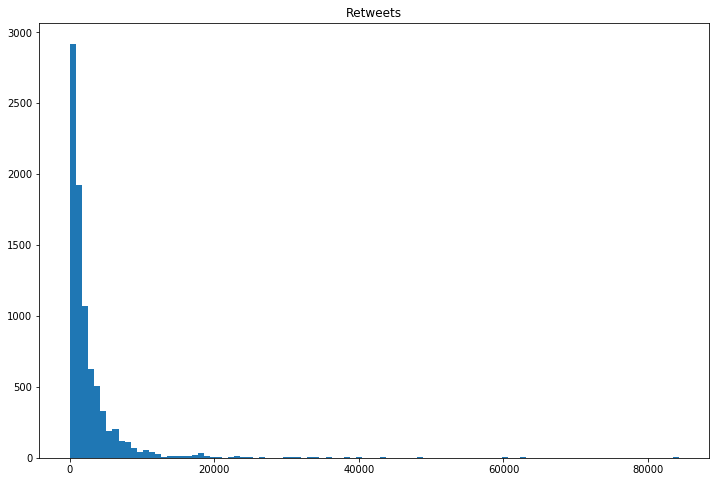

In [34]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import numpy as np
from numpy.polynomial.polynomial import polyfit


plt.figure(figsize=(12,8))
plt.hist(tweet_df['retweet_count'].dropna(),bins=100)
plt.title('Retweets')

In [ ]:
tweet_df.sort_values('retweet_count',ascending=False)['retweet_count'].head(30)

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(tweet_df['retweet_count'].dropna(),bins=500)
plt.xlim(0,20000)
plt.xticks(np.arange(0, 20000, 2000))
plt.title('Retweets')

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(tweet_df['favorite_count'].dropna(),bins=100)
plt.title('Likes')

In [ ]:
tweet_df.sort_values('favorite_count',ascending=False)['favorite_count'].head(30)

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(tweet_df['favorite_count'].dropna(),bins=500)
plt.xlim(0,50000)
plt.xticks(np.arange(0, 50000, 5000))
plt.title('Likes')

Next I want to see if there is a correlation between the number of likes a tweet has and the number of times it has been retweeted. I use a simple scatterplot for this:

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(tweet_df['retweet_count'],tweet_df['favorite_count'],alpha=.6)
plt.xlabel('Retweets')
plt.ylabel('Likes')

In [ ]:
small_df=tweet_df[tweet_df['retweet_count']<6000]
plt.figure(figsize=(12,8))
x=small_df['retweet_count']
y=small_df['favorite_count']
plt.scatter(x,y,alpha=.3)
plt.xlabel('Retweets')
plt.ylabel('Likes')

b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-',color='red')

In [127]:
hashtag_df['hashtag'].value_counts().head(10)

BarkWeek                 9
PrideMonth               4
ScienceMarch             1
BellLetsTalk             1
FinalFur                 1
NoDaysOff                1
LoveTwitter              1
K9VeteransDay            1
dogsatpollingstations    1
Canada150                1
Name: hashtag, dtype: int64

In [128]:
hashtag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
hashtag     29 non-null object
tweet_id    29 non-null object
dtypes: object(2)
memory usage: 536.0+ bytes


In [247]:
# tweet_df['rating_numerator']=tweet_df['rating_numerator'].astype(float)
# tweet_df['rating_denominator']=tweet_df['rating_denominator'].astype(float)

for i in tweet_df.index:
    if tweet_df.loc[i,'rating_numerator'] is not None:
        tweet_df.loc[i,'grade']=float(tweet_df.loc[i,'rating_numerator'])/int(tweet_df.loc[i,'rating_denominator'])
            
tweet_df.sort_values('grade',ascending=False)['grade'].head(30)
# tweet_df.loc[1351,:]

979     177.6
2074       42
395       1.4
199       1.4
35        1.4
76        1.4
209       1.4
41        1.4
418       1.4
866       1.4
164       1.4
490       1.4
347       1.4
426       1.4
436       1.4
339       1.4
404       1.4
56        1.4
758       1.4
1053      1.4
83        1.4
1609      1.4
187       1.4
1068      1.4
184       1.4
449       1.4
631       1.4
214       1.4
448       1.4
22        1.4
Name: grade, dtype: object

The highest grade is just a play on the Declaration of Independence year, and the second highest grade belong so Snoop Dog. So the highest authentic grades are 1.4, which seem to be pretty common. Let's see if there is any relationship between grades on the one hand, and retweets and likes on the other.

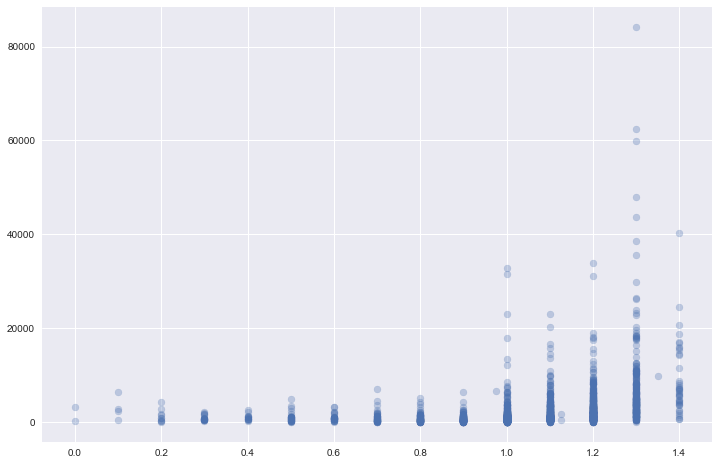

In [250]:
plt.figure(figsize=(12,8))
temp_df=tweet_df.drop([979,2074],axis=0)
plt.scatter(temp_df['grade'],temp_df['retweet_count'],alpha=.3)

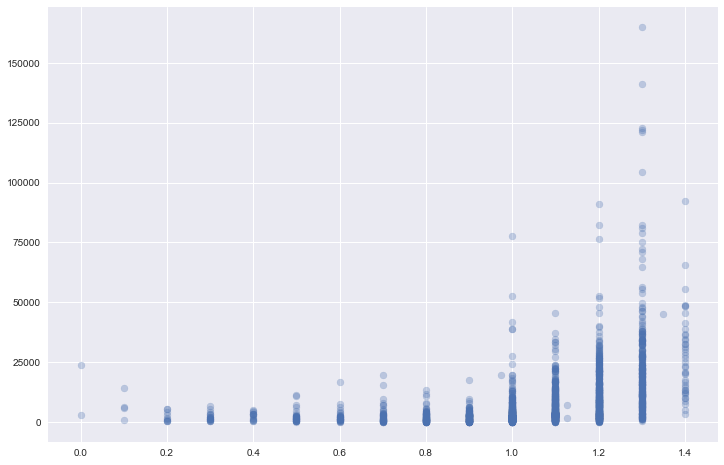

In [251]:
plt.figure(figsize=(12,8))
plt.scatter(temp_df['grade'],temp_df['favorite_count'],alpha=.3)

(0, 20000)

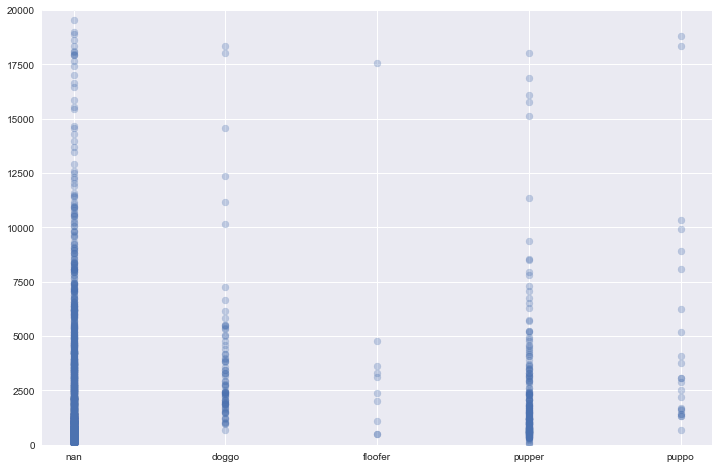

In [270]:
plt.figure(figsize=(12,8))
u, inv = np.unique(tweet_df["dog_stage"], return_inverse=True) 

plt.scatter(inv,tweet_df['retweet_count'],alpha=.3)
plt.xticks(range(len(u)),u)
plt.ylim((0,20000))

(0, 7500)

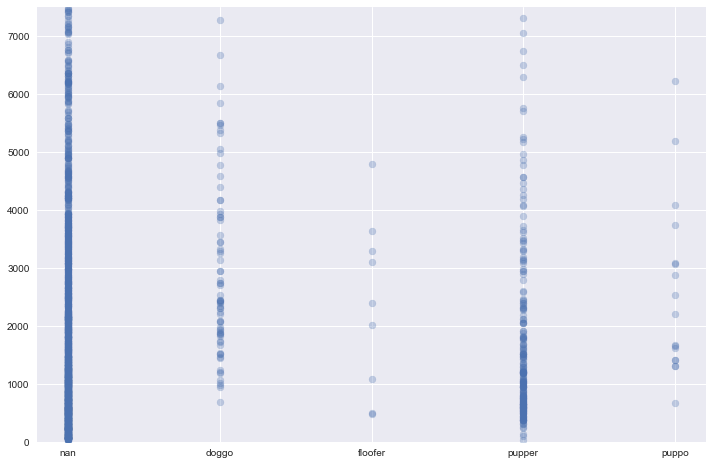

In [273]:
plt.figure(figsize=(12,8))
u, inv = np.unique(tweet_df["dog_stage"], return_inverse=True) 

plt.scatter(inv,tweet_df['retweet_count'],alpha=.3)
plt.xticks(range(len(u)),u)
plt.ylim((0,7500))

In [ ]:
tweet_df['month_sent']=tweet_df['timestamp'].dt.month

month_list=['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(tweet_df.shape[0]):
    tweet_df.loc[i,'month_sent']=month_list[int(tweet_df.loc[i,'month_sent'])-1]
    
tweet_df['day_sent']=tweet_df['timestamp'].dt.weekday

weekday_list=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(tweet_df.shape[0]):
    tweet_df.loc[i,'day_sent']=weekday_list[tweet_df.loc[i,'day_sent']]
    
tweet_df['hour_sent']=tweet_df['timestamp'].dt.hour

In [144]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2298
Data columns (total 16 columns):
tweet_id                 2127 non-null object
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                2127 non-null datetime64[ns]
source                   2127 non-null object
text                     2127 non-null object
expanded_urls            2127 non-null object
rating_numerator         2121 non-null object
rating_denominator       2121 non-null float64
name                     2045 non-null object
retweet_count            2127 non-null float64
favorite_count           2127 non-null float64
user_mentions            2125 non-null object
hashtags                 2124 non-null object
dog_stage                350 non-null object
month_sent               2127 non-null object
dtypes: datetime64[ns](1), float64(5), object(10)
memory usage: 394.5+ KB


<BarContainer object of 12 artists>

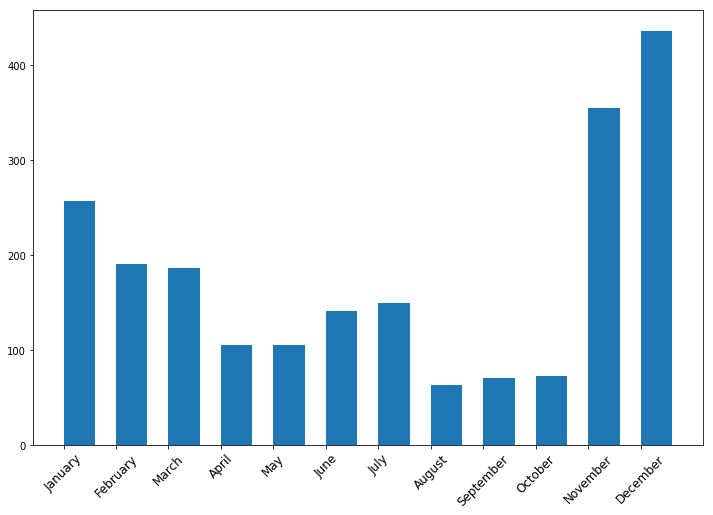

In [163]:
plt.figure(figsize=(12,8))
serie=tweet_df['month_sent'].value_counts()
serie=serie.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
serie
index=np.arange(len(serie))
labels=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(index, labels, fontsize=12, rotation=45)
plt.bar(index,serie.values,align='edge',width=.6)


Monday       353
Tuesday      318
Wednesday    314
Thursday     301
Friday       297
Saturday     274
Sunday       270
Name: day_sent, dtype: int64


<BarContainer object of 7 artists>

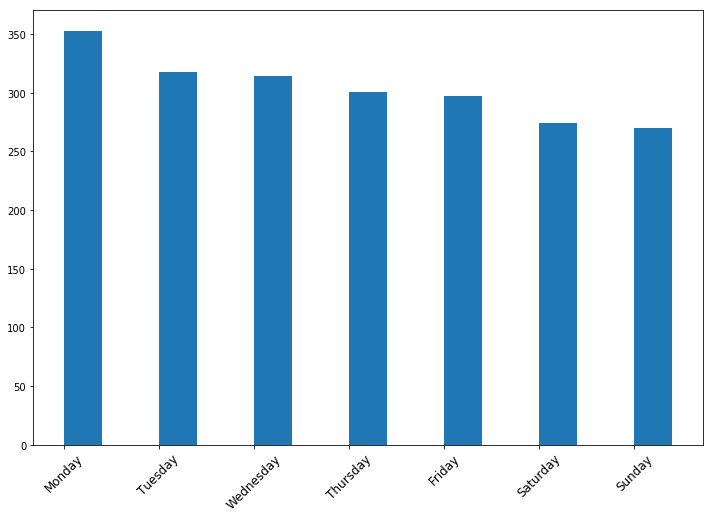

In [162]:
plt.figure(figsize=(12,8))
serie=tweet_df['day_sent'].value_counts()
print serie
serie=serie.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
serie
index=np.arange(len(serie))
labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(index, labels, fontsize=12, rotation=45)
plt.bar(index,serie.values,align='edge',width=.4)


In [316]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                 2127 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                2127 non-null datetime64[ns]
source                   2127 non-null object
text                     2127 non-null object
expanded_urls            2127 non-null object
rating_numerator         2121 non-null object
rating_denominator       2121 non-null float64
name                     2127 non-null object
retweet_count            2124 non-null float64
favorite_count           2124 non-null float64
hashtags                 2124 non-null object
grade                    2121 non-null object
dog_stage                350 non-null object
month_sent               2127 non-null object
day_sent                 2127 non-null int64
hour_sent                2127 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(9)
m

Although I don't think I'll use this dataframe for visualizations or insights, I believe it would be more appropriate to consider each prediction as a separate observation. In other words, we should have a value/column named 'prediction' which will collate the existing `p1`,`p2`, and `p3` columns (the digits in the column names don't really give us any additional information - we can tell which prediction is more likely by looking at the `p_conf` columns).

This step will also involve collapsing the `p_conf` and `p_dog` columns.

Add: retweet_count,created_at,favorite_count

Cleaning:
1. Names: replace those starting with lowercase with 'None'
2. Ratings: normalize to denominator 10: multiply numerator by 10, divide by denominator 
3. Check to see if any dog categories were missed.
4. Remove rows that are retweets. Use any of the 'retweeted' columns to identify these (if any are left after merging?)

